<img src="https://github.com/i3hsInnovation/resources/blob/7f7f7b810a6cfc2b3deb8740e26b25bd05727918/images/banner_introProg.png?raw=true" width="100%" align="left" />

<table style="float:right" width="50%">
    <tr>
        <td>                      
            <div style="text-align: left"><a href="" target="_blank">Dr Peter Causey-Freeman</a></div>
            <div style="text-align: left">Lecturer - Healthcare Sciences</div>
            <div style="text-align: left">(Clinical Bioinformatics)</div>
            <div style="text-align: left">The University of Manchester</div>
         </td>
         <td>
             <img src="https://github.com/i3hsInnovation/resources/blob/master/images/pete.001.png?raw=true" width="30%" />
         </td>
     </tr>
</table>

# Introduction to Programming with Shell Scripts

****

#### About this Notebook
This notebook will help you learn how to connect commands together using pipes and filters and develop shell scripts to analyse biological data. It will introduce how to write a basic shell script which parses an alignment file to return information about the alignment to see if it is "gapped". As the alignments between transcrips and chromosomes are often misunderstood we will explore them in detail within this notebook.

This notebook is at <code>Beginner</code> level and will take approximately 2 - 3 hours to complete.

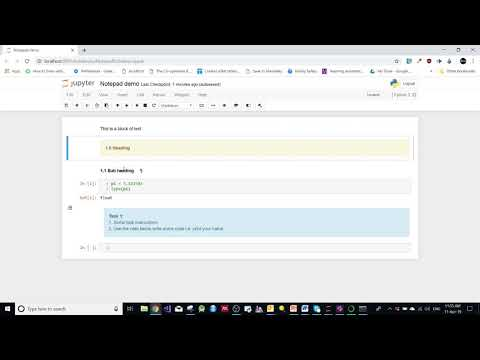

In [1]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/C8y8gZpJzXI"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('C8y8gZpJzXI', width=560, height=315)

<div class="alert alert-block alert-warning"><b>Learning Objectives:</b> <br/>
    <ul>
        <li>Express an understanding of the basic principles shell scripting</li> 
        <li>Explain	the reasoning behind the use of shell scripting</li>
        <li>Create your own basic shell script</li>
        <li>Explore alignments between a transcript reference sequence and a chromosome reference sequence that are contained in alignment files</li>
        <li>Describe why gaps sometimes exist in the alignments</li>         
    </ul>
</div>

<b>Contents</b>
<a id="top"></a>

<ul style="list-style:none;">
<li>1.0 <a href="#intro">Introduction</a></li>
<li>2.0 <a href="#shell">What is Shell Scripting?</a></li>    
<li>3.0 <a href="#variables">Variables</a></li>
<li>4.0 <a href="#conditional">Conditional statements</a></li>
<li>5.0 <a href="#forloops">For Loops</a></li> 
<li>6.0 <a href="#functions">Functions</a></li> 
<li>7.0 <a href="#positional">Positional Arguments</a></li> 


<a name="intro"></a>
### 1.0 Introduction

This notebook blends a video tutorial which teaches the basics of shell scripting with practical applications related to bioinformatics and the understanding of shell commands. The full video course can be found [here](https://hackersploit.org/bash-scripting/)

#### Running shell commands in a Jupyter notebook

Jupyter notebooks utilise a Python interpreter. This notebook uses the interpreter in the Python environment from which it is being run. The following code shippet shows this.

In [11]:
# Using the native Python interpreter to display the location of the utilised python.exe
from distutils.spawn import find_executable
print(find_executable('python'))

C:\Users\mbxssfh3\AppData\Local\Continuum\anaconda3\python.exe


What you will notice is that we need to import modules and use imported functions to perform what is a very simple task. We can perform this task using bash in a single simple command

```bash
$ which python
```
So, how can we run this command from within this notebook? Thankfully the Jupyter team have provided a way of doing this. We can use the python interpreter used by the notebook like this

```python
! which python
```

**Try it out**

In [12]:
! which python

'which' is not recognized as an internal or external command,
operable program or batch file.


[Return to top](#top)

-------------

### 2.0 What is Shell Scripting?

This video is a nice short introduction to shell scripting and covers several core themes:
- What are bash scripts?
- The difference between bash scripting and Python scripting
- What is bash scripting good for?
- How the scripts handle data
- An example of a simple script
- What is the interpreter used by a script (The shebang)
- Why we need to specify a specific interpreter in an executable script

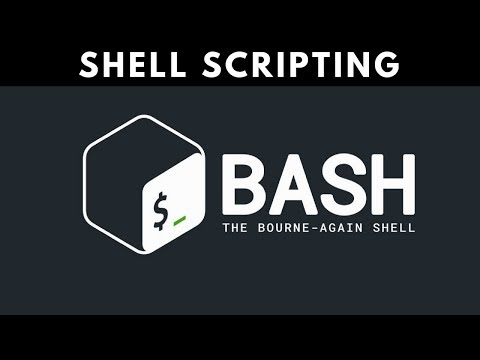

In [2]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('LTuuMtQR1uQ', width=560, height=315)

<div class="alert alert-block alert-info">  
    
### Tasks
As we progress through this notebook, we are going to write a shell script that will download, parse and extract data from a transcript to genome alignment file. To get started, we need to set up a directory structure that we will use for the remainder of the practical.

#### Make sure we are in the correct directory
We need to work from the `~/PycharmProjects/Introduction-to-Programming/section_3` directory (where ~ is your home directory). Run the followinf command and make sure it ends in `PycharmProjects/Introduction-to-Programming/section_3`. If it does not, close down the notebook. Navigate to this directory on the bash terminal and re-start Jupyter notebooks.
</div>

In [12]:
! pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


<div class="alert alert-block alert-info">

#### Create a directory structure
We want to create the following structure within the section_3 directory

shell_scripts
.
.
.
alignment_files

In the bash shell, type the following commands

```bash
$ mkdir ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts
$ mkdir ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts/alignment_files
```

***Note: The*** `$` ***symbol is used as a line hanger. Do not type*** `$` ***before your command***

We will also create our shell script which we will edit during this tutorial

```bash
$ > ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts/alignment_parser.sh
```

#### The Shebang
As described in the video, we need to add the correct shebang to the shell script. Use the following cell to identify your bash interpreter. *Note, you have used the command before but to identify the Python interpreter. Once you have identified the interpreter, paste it into the top of your `alignment_parser.sh` file.

</div>

<div class="alert alert-block alert-info">

#### Permissions
We now need to check whether we can execute the file. Let's take a look at the permissions
    
</div>

In [ ]:
! ls -l ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts

<div class="alert alert-block alert-info">

If you are a root user, you will have execute access to the file, however let's go through the motions and make sure that all users can execute the file

</div>

In [ ]:
! chmod a+x ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts/alignment_parser.sh

<div class="alert alert-block alert-info">

Check the permissions again and see if they have changed (they may not have)
   
</div>

In [ ]:
! ls -l ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts

<a name="variables"></a>
### 3.0 Variables

Most programs receive data from some input that the program then manipulates in some way to produce a result or output. This input can be very diverse. For example it maybe a keypress in a video game to move a character on the screen, a list of payroll numbers or some data from a Martian probe. In all cases we need to store this data somewhere. In computer programs we use **`variables`** to store data. The name variable implies that the thing being stored may vary. Let look at some examples. 

#### What are variables
The next video in this series introduces variables in the following contexts:
- Why we use variables
- Creating variables ane best practice
- Using a simple variable
- concatenating a simple variable
- Variable naming and good pactice

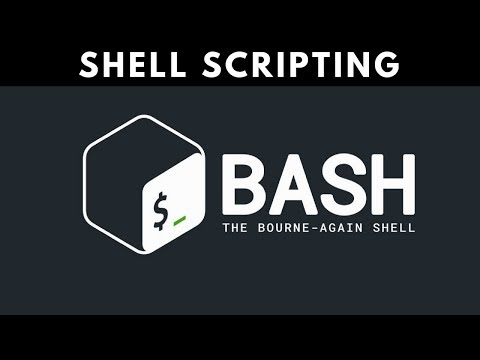

In [3]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('WhqfbwQbWVE', width=560, height=315)

#### Variables from User inputs and comments
The next video in this series covers user inputs and comments in the following contexts:
- Reading data from the keyboard
- Prompts (-p)
- Storing the read data in a variable
- Splitting data across multiple variables and commenting scripts

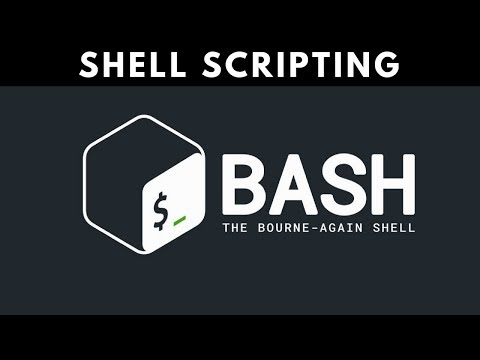

In [4]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('yLQnpmkNFmk', width=560, height=315)

<div class="alert alert-block alert-info">

### Tasks
Now we have learned how to collect variables from the command line using a shell script, we need a piece of information from the user to make our final script work

- The genome build

We only want to accept genome builds GRCh38 and GRCh38

Keep this in mind as we will apply some input tests in later sections of this notebook

#### In your script, collect variables from the user
To your script add code which
- Collects from the user the genome build with the prompt "Input genome build GRCh37 or GRCh38:"
- The variable should be called GENOME

***Note: Test that the script works by adding echo commands and run it (currently, any text is allowed, so just test the script)***
    
***

To run the script, in your bash shell type

```bash
$ ./section_3/shell_scripts/alignment_parser.sh
```

***Hint, are you in the correct working directory?***

</div>

<a name="conditional"></a>
### 4.0 Conditional statements

Conditional statements allow us to apply tests, for example whether a file exists in the current directory

The next 2 videos in this series covers basic conditional statements:

**Vid 1: What are conditional statements and why are they used?**
- The if statement
- The if statement syntax
- The syntax of the conditional statement
- The if else syntax

**Vid 2: Using conditional statements to perform tests**
- What we use tests for
- Getting help
- file operators
- string operators
- Checking for directories and fles using file operators

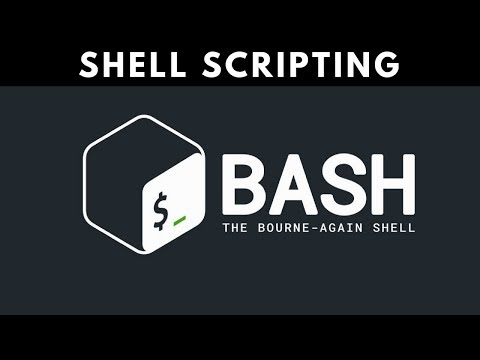

In [5]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('qoem5hqCH6A', width=560, height=315)

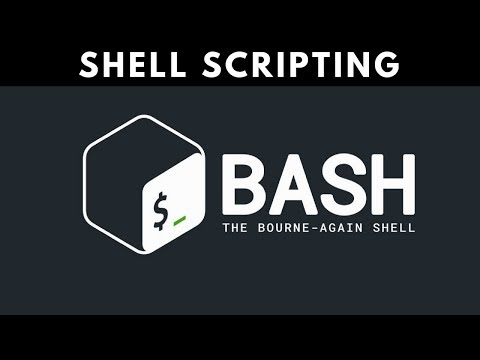

In [6]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('ujp6d1he-jk', width=560, height=315)

#### Finding substrings in strings
The examples provided in the videos provide if statements that test whether a variable is equal to a string (either singularly or contained in a list). However, we meed to check whether our variable contains a substring. We will need to be able to do this later in this tutorial.

Take a look at how to solve this as provided in Stack Overflow [here](https://stackoverflow.com/questions/229551/how-to-check-if-a-string-contains-a-substring-in-bash)

#### Logic opperators
We will need to determine whether the input genome build is GRCh37 or GRCh38

Take a look at Boolean Operators section in this If statement [tutorial](https://ryanstutorials.net/bash-scripting-tutorial/bash-if-statements.php)

#### If, elif, else
In the next section, we will need to download the correct alignment file for the selected genome build. We therefore need to be able to create and if, elif, else statement

Take a look at if, elif, else section in this If statement [tutorial](https://ryanstutorials.net/bash-scripting-tutorial/bash-if-statements.php)

<div class="alert alert-block alert-info">

### Tasks
We have written code that allows us  to collect variables from the command line. We now need to test whether a supported genome build has been entered.

#### Create and if statement to check the input genome build is supported

- Your if statement should check whether the variable GENOME is "GRCh37" or "GRCh38"
- If the statement is True, use `echo "$GENOME Selected"` and set the variable `GENOME_OK=True`
- If the statement is False, use `echo "Genome ID $GENOME is not supported" and set the variable `GENOME_OK=False`
    
At the bottom of your script add the command
```bash
    echo "Is the Genome ID OK: $GENOME_OK"
```
This gives us a quick way of telling whether the user had entered a correctly formated genome-build by displaying True or False

***
    
To run the script, in your bash shell type

```bash
$ ./section_3/shell_scripts/alignment_parser.sh
```

***Hint, are you in the correct working directory?***

</div>

<a name="forloops"></a>
### 5.0 For Loops

The next video in this series covers the use of for loops:
- What are loops?
- Why we might use them
- The for loop syntax
- A simpe example including how to create a list
- The cat command and loop efficiency

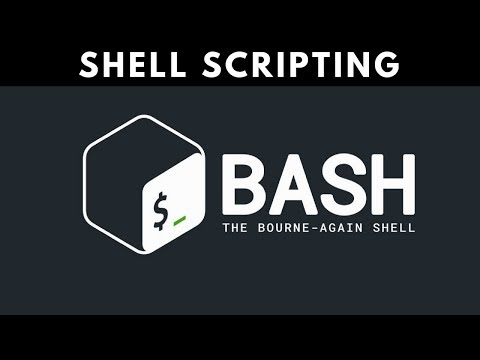

In [7]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('T7hVOiTsSUU', width=560, height=315)

<div class="alert alert-block alert-info">

### Tasks
Before we crete a for loop, we need to download some data to parse.
    
We will use the following command to download files containing alignment data between refseq transcript referencesequences and chromosome reference sequences from the [RefSeq website](https://ftp.ncbi.nih.gov/refseq/H_sapiens/alignments/)
    
```bash
$ curl 'https://ftp.ncbi.nih.gov/refseq/H_sapiens/alignments/GCF_000001405.39_knownrefseq_alignments.gff3' -o ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts/alignment_files/grch38.gff
```

Once we have downloaded the file, we can take a look at its contents using the more comand. Loo at the first 5 lines with the command

```bash
$ head -5 ~/PycharmProjects/Introduction-to-Programming/section_3/shell_scripts/alignment_files/grch38.gff
```
    
We see the following metadata that tells us about the file

```txt
##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
```
</div>
    
This file adheres to gff-version 3, specification version 1.21. The current specification version is [1.26](https://github.com/The-Sequence-Ontology/Specifications/blob/master/gff3.md)

### The GFF3 specification
Lets take a look at a line of the downloaded gff3 file in the context of the specification. A line looks like this:

```txt
NC_000002.12    RefSeq  cDNA_match      178807212       178807423       212     -       .       ID=075b8e95ac4c30cb099d6e96df888c5a;Target=NM_001267550.2 1 212 +;gap_count=0;identity=1;idty=1;num_ident=109224;num_mismatch=0;pct_coverage=100;pct_identity_gap=100;pct_identity_ungap=100
```
***Each line in this gff3 file is an Exon, where the transcript is aligned to a chromosome***

***
**Column 1: "seqid"**

The ID of the landmark used to establish the coordinate system for the current feature. IDs may contain any characters, but must escape any characters not in the set 

```bash
$[]a-zA-Z0-9.:^*@!+_?-|
```
In particular, IDs may not contain unescaped whitespace and must not begin with an unescaped `>`

```txt
NC_000002.12
```
***
**Column 2: "source"**

The source is a free text qualifier intended to describe the algorithm or operating procedure that generated this feature. Typically this is the name of a piece of software, such as "Genescan" or a database name, such as "Genbank." In effect, the source is used to extend the feature ontology by adding a qualifier to the type creating a new composite type that is a subclass of the type in the type column.

```txt
RefSeq
```
***
**Column 3: "type"**

The type of the feature (previously called the "method"). This is constrained to be either a term from the Sequence Ontology or an SO accession number. The latter alternative is distinguished using the syntax SO:000000. In either case, it must be sequence_feature (SO:0000110) or an is_a child of it.

```txt
Not used in this file
```
***
**Columns 4 & 5: "start" and "end"**

The start and end coordinates of the feature are given in positive 1-based integer coordinates, relative to the landmark given in column one. Start is always less than or equal to end.

```txt
178807212       178807423
```
***
***Column 6: "score"***

The score of the feature, a floating point number. As in earlier versions of the format, the semantics of the score are ill-defined. It is strongly recommended that E-values be used for sequence similarity features, and that P-values be used for ab initio gene prediction features

```txt
212 # where 212 is the length of the alignment in bases (start position to end position)
```
***
**Column 7: "strand"**

The strand of the feature. + for positive strand (relative to the landmark), - for minus strand, and . for features that are not stranded. In addition, ? can be used for features whose strandedness is relevant, but unknown.

```txt
- # So antisense to the chromosome in this case
```
***

**Column 8: "phase"**

For features of type "CDS", the phase indicates where the next codon begins relative to the 5' end (where the 5' end of the CDS is relative to the strand of the CDS feature) of the current CDS feature. For clarification the 5' end for CDS features on the plus strand is the feature's start and and the 5' end for CDS features on the minus strand is the feature's end. The phase is one of the integers 0, 1, or 2, indicating the number of bases forward from the start of the current CDS feature the next codon begins. A phase of "0" indicates that a codon begins on the first nucleotide of the CDS feature (i.e. 0 bases forward), a phase of "1" indicates that the codon begins at the second nucleotide of this CDS feature and a phase of "2" indicates that the codon begins at the third nucleotide of this region. Note that ‘Phase’ in the context of a GFF3 CDS feature should not be confused with the similar concept of frame that is also a common concept in bioinformatics. Frame is generally calculated as a value for a given base relative to the start of the complete open reading frame (ORF) or the codon (e.g. modulo 3) while CDS phase describes the start of the next codon relative to a given CDS feature.

The phase is REQUIRED for all CDS features.

```txt
. # RefSeq do not provide CDS alignments in these alignent gff3 files but Ensembl do. It is worth being aware of this column
```
***
**Column 9: "attributes"**

A list of feature attributes in the format tag=value. Multiple tag=value pairs are separated by semicolons. URL escaping rules are used for tags or values containing the following characters: ",=;". Spaces are allowed in this field, but tabs must be replaced with the \%09 URL escape. Attribute values do not need to be and should not be quoted. The quotes should be included as part of the value by parsers and not stripped.

```txt
ID=075b8e95ac4c30cb099d6e96df888c5a;Target=NM_001267550.2 1 212 +;gap_count=0;identity=1;idty=1;num_ident=109224;num_mismatch=0;pct_coverage=100;pct_identity_gap=100;pct_identity_ungap=100
```
***

***Column 9 is sub-devided into tags***

RefSeq use official and unofficial tags in their alignment gff3 files which are documented [here](https://www.ncbi.nlm.nih.gov/datasets/docs/about-ncbi-gff3/) under section `Alignments`
***

### Tags and Gaps
To better understand tags, we will take a look at an exon which requires a gap to be inserted into wither the transcript or the genome to achieve a perfect alignment.

```txt
NC_000004.12	RefSeq	cDNA_match	3074681	3075088	403.892	+	.	ID=9dfa5ba40ef872c7e8a17f340233f3c6;Target=NM_002111.8 1 414 +;gap_count=1;identity=0.999555;idty=0.985507;num_ident=13475;num_mismatch=0;pct_coverage=99.9555;pct_identity_gap=99.9555;pct_identity_ungap=100;Gap=M255 I6 M153
```
***
**ID**
The ID `ID=9dfa5ba40ef872c7e8a17f340233f3c6` used by RefSeq is used to reference the alignment of a transcript to a chromosome, *i.e.* all exons have the same ID because the ID belongs to the entire alignment
***
**Target**
The target tells us a lot of information
`Target=NM_002111.8 1 414 +`
It provides
- The Transcript ID in full
- The start position of the exon, in this case base 1
- The end point of the exon, in this case base 2
- The orientation of the alignment, which is always + in transcrpt context, so be aware of the alignment level orientation!
***
**Other tags**
Information on the other tags can be found [here](https://www.ncbi.nlm.nih.gov/datasets/docs/about-ncbi-gff3/) under section `Alignments`
***
**Gap**
The Gap tag is an Exon level tag, i.e. it belongs to the specified exon. It tells us where the gap must be added to achieve the perfect alignement.
`Gap=M255 I6 M153`
The gap is a whitespace delimited [CIGAR string](https://jef.works/blog/2017/03/28/CIGAR-strings-for-dummies/)
This particular CIGAR string tells us that
- 255 bases can be aligned (note, alignment does not care if a few bases of sequence missmatch, so long as the length is equal
- we need to insert 6 bases into the chromosome which are present in transcript to achieve a perfect alignment
- 153 bases align
***
***Most geneticists and software platforms, including VEP, are unaware of these gaps so make critical mistakes in predicting the outcomes of variation in transcripts that have gapped alignments. So, let's adapt our script to check for aligmnet gaps***


<div class="alert alert-block alert-info">

### Tasks
We are going to create a for loop which reads the alignment gff3 file we downloaded earlier and looks and reports whether there is a Gap in any of the alignments it contains. If a Gap is found it will print data about each Exon containing a gap including the CIGAR string.

To your code:
- Add a test to make sure the alignment file for the specified genome build is in the alignment_files directory (currently we should only have grch38.gff
- If it is not present add code that uses the `curl` command to dowmload the specified genome build
- Finally, crate the variable `ALIGNMENT_FILE_OK` under each test that returns True if once the file is available for use
    

At the bottom of the script, add the command
```bash
    echo "Is the Alignment file available: $ALIGNMENT_FILE_OK"
```

***Note, we will have 2 final tests:***
- Genome build is input correctly
- Alignment file for that genome build is downloaded

***

To run the script, in your bash shell type. 
***Note: Set the genome build to GRCh37 to make sure you download the GRCh37 alignment file at this stage***

```bash
$ ./section_3/shell_scripts/alignment_parser.sh
```

***Hint, are you in the correct working directory?***
    
*At this stage we will pause because we will place the for loop into a function in the next section*

</div>

<a name="functions"></a>
### 6.0 Functions

The next video in this series covers basic functions:
- What are functions?
- How to create functions and best practices
- Were to declare functions in a script
- If statements
- Calling functions
- Calling functions from within a function

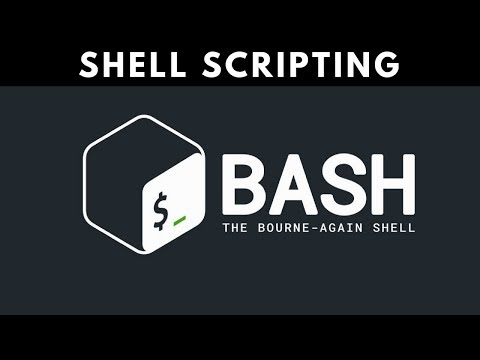

In [8]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('Jx9yhQ76o8U', width=560, height=315)

<div class="alert alert-block alert-info">

### Tasks
We are going to create function that contains a for loop which reads the alignment gff3 file we downloaded earlier and looks for a transcript ID and chromosome ID and reports whether there is a Gap. If a Gap is found it will print data about each Exon containing a gap including the CIGAR string.
    
#### The function
The function we will use to extract the alignment data is provided here

```bash
# Create functions
function gap_finder() {
#  Open the file using the file handle and read line-by-line
while IFS= read -r line; do
    if [[ $line == *"Gap="* ]]
    then
      echo "$line"
    fi
done < "$ALIGNMENT_FILE"
}
```

The function reads throught the alignment file line-by-line, as described [here](https://stackoverflow.com/questions/10929453/read-a-file-line-by-line-assigning-the-value-to-a-variable)

***

Your task is to put this function in the correct place and invoke the function from your script
</div>

<a name="positional"></a>
### 7.0 Positional Arguments

The next video in covers positional arguments (parameters):
- What are positional parameters?
- How to collect the parameters in a script
- How to declare positional parameters
- A simple example
- Common mistakes made when using positional parameters

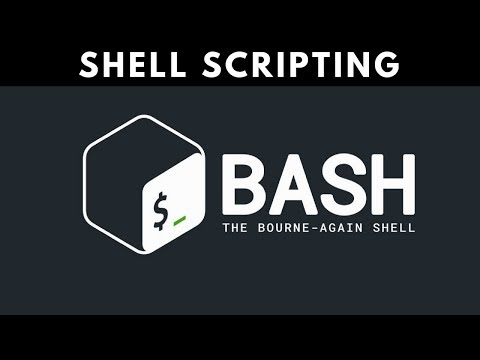

In [9]:
#%%html
# <iframe width="560" height="315" src="https://www.youtube.com/embed/pTB0EiLXUC8"></iframe>
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('MBYnhVaN4rU', width=560, height=315)

<div class="alert alert-block alert-info">

### Tasks
We want to collect the output of the shell script into text files
    
To each echo statement that simpley provides information, i.e. does not write an alignment line add a hash, e.g.

```bash
$ echo "# Is the Genome ID OK: $GENOME_OK"
```
becomes

```bash
$ echo "Is the Genome ID OK: $GENOME_OK"
```
So you are effectively writing metadata lines. You may want to change the echo statements to something more meaninful, such as a date, or where the alignment files were downloaded from. Just make sure all info/metadata lines begin with a hash `#`.

***
    
Run the script twice using the following command
    
```bash
$ ./section_3/shell_scripts/alignment_parser.sh > grch38_gapped.txt
```

***Note: you will need to do this for both GRCh37 and GRCh38. Make sure you state the correct genome build***
</div>

#### Conclusion

This is just a small sample of the sort of things you can use shell scripting for. Hopefully this short introduction to programming using shell scripting has provided a  background on which you can go on to develop your skills. Many of the concepts explained here are present in many other modern programming languages (even if their syntax is different). Programming is a skill that requires practice and trial and error. The more you do it, the better you will get, rather like playing a musical instrument. 

#### Notebook details
<br>
<i>Notebook created by <strong>Dr. Pete Causey-Freeman</strong> with, <strong>Frances Hooley</strong> 
    

Publish date: October 2020<br>
Review date: October 2021</i>

Please give your feedback using the button below:

<a class="typeform-share button" href="https://form.typeform.com/to/YMpwLTNy" data-mode="popup" style="display:inline-block;text-decoration:none;background-color:#3A7685;color:white;cursor:pointer;font-family:Helvetica,Arial,sans-serif;font-size:18px;line-height:45px;text-align:center;margin:0;height:45px;padding:0px 30px;border-radius:22px;max-width:100%;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;font-weight:bold;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;" target="_blank">Rate this notebook </a> <script> (function() { var qs,js,q,s,d=document, gi=d.getElementById, ce=d.createElement, gt=d.getElementsByTagName, id="typef_orm_share", b="https://embed.typeform.com/"; if(!gi.call(d,id)){ js=ce.call(d,"script"); js.id=id; js.src=b+"embed.js"; q=gt.call(d,"script")[0]; q.parentNode.insertBefore(js,q) } })() </script>